# A Data Analysis of IMDB and Rotten Tomatoes 

## Author: Brittney Nitta-Lee

### Introduction

<p> This project analyzes data from IMDB and Rotten Tomatoes to explore which genres and movie studios are the most successful in the movie industry. Microsoft is looking to create a new movie studio to produce original video content and wants to know what type of films are doing best at the box office. This analysis provides insights for the client to help decide what movies to create.</p>

### Questions

<p>This project will address four questions about the movie industry:

1. What are the top grossing movie genres? 
2. Does movie runtimes affect profitability?
3. What genre of movies are the most popular based on user ratings?   
4. What movie content rating based on genre is the most popular?</p>

### Data

<p>IMDB
<br> The analysis examines a merged form of data from Box Office Mojo by IMDbPro and IMDB. BOM (Box Office Mojo) has data on domestic gross, and IMDB has data on movie genres.</p>

<p>Rotten Tomatoes
<br>Rotten Tomatoes contains data on genres, user ratings and movie content rating that is used to address popular genres based on content rating and popular genres based on user ratings.

## Data preparation

<p>First, I imported the necessary packages to process the data. In this case, SQL and Pandas were used.</p>

In [1]:
import sqlite3
import pandas as pd

### IMDB Data

<p> The IMDB dataset has two tables that were used in this data cleaning. Movie Basics and Movie Ratings includes data files that provide movie genres, title, start year and average votes.</p>

In [2]:
#create connection to database 
conn = sqlite3.connect('im.db')
cur = conn.cursor()

<p> Pandas is used to format the IMDB data into the following dataframes. I opened the Box Office Mojo datafile to see the domestic gross and foreign gross of movies. This dataset also contains the movie studio of each film.</p>

In [3]:
movie_gross = pd.read_csv ('bom.movie_gross.csv')   

movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<p><b>Movie_basics table:

In [4]:
movie_basics = pd.read_sql("""
    SELECT *
    FROM movie_basics;
    """, conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,domestic_gross,title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",None,None
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",None,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",None,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",None,None


<p><b>Movie_ratings table:

In [5]:
movie_ratings = pd.read_sql("""
    SELECT *
    FROM movie_ratings;
    """, conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


<p>Movie Basics and Movie Gross both have a column for individual movie titles. I want to see if the two datasets share the same data under Title and Primary Title columns. I merged the datasets along the title and primary title columns will show movies that share the same title. </p>

In [6]:
movie_basics = movie_gross.merge(movie_basics, how='inner', left_on='title', right_on='primary_title')
movie_basics.head()

,title_x,studio,domestic_gross_x,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,domestic_gross_y,title_y
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",None,None
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",None,None
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",None,None
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",None,None
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",None,None


In [7]:
movie_basics["title_x"].describe()

count     3366
unique    2605
top       Gone
freq        15
Name: title_x, dtype: object

<p> The title merge with Movie Basics and Movie Gross shows 2605 unique titles, out of 3366. Due to missing data, I moved on and created a new dataframe to join Movie Basics and Movie ratings using Movie ID.</p>

In [8]:
imbd_df= pd.read_sql("""

SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;
""", conn)
imbd_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,domestic_gross,title,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",None,None,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",None,None,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,None,None,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",None,None,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",None,None,6.5,119


Genres are separated by commas, and wanted to separate genres to get a better visualization for my analysis. 

In [9]:
imbd_df['genres'] = imbd_df['genres'].str.split(',')
imbd_genres_df = imbd_df.explode('genres')

I used the pandas describe function to take a look at my new dataframe's stats. I don't see any missing data under movie_id so it's time to plot my data. 

In [10]:
imbd_df.describe(include = [object])

,movie_id,primary_title,original_title,genres,domestic_gross,title
count,73856,73856,73856,73052,0,0
unique,73856,69993,71097,923,0,0
top,tt3592196,The Return,Broken,[Drama],NaN,NaN
freq,1,11,9,11612,NaN,NaN


### Analysis

Imported the required packages to plot my data. 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

I wanted to find out what the to grossing moving genres are. Using my movie_basics dataset, I used the explode function to separate genres. 

In [12]:
#explode function to separate genres 
movie_basics['genres'] = movie_basics['genres'].str.split(',')
movie_basics_genres = movie_basics.explode('genres')
movie_basics_genres

,title_x,studio,domestic_gross_x,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,domestic_gross_y,title_y
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,Adventure,None,None
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,Animation,None,None
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,Comedy,None,None
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,Action,None,None
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,Adventure,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,Thriller,None,None
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,Action,None,None
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,Drama,None,None
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,Thriller,None,None


Now that my genres and separated, it was time to prepare my data for analysis. 

In [13]:
#group genres, domestic gross, studio 

moviebasics_group_table = (
    movie_basics_genres
    .groupby('genres')
    .sum()
    .reset_index()
    .sort_values('domestic_gross_x', ascending = False)[['genres', 'domestic_gross_x']]
)
moviebasics_group_table

,genres,domestic_gross_x
1,Adventure,4.191778e+10
0,Action,3.843915e+10
4,Comedy,3.249809e+10
7,Drama,3.105158e+10
17,Sci-Fi,1.495762e+10
19,Thriller,1.367092e+10
2,Animation,1.362289e+10
5,Crime,9.352542e+09
9,Fantasy,9.288773e+09
16,Romance,7.331809e+09


Now that my data is a nice table grouped by genre and domestic gross, it's time to create a bar graph. 

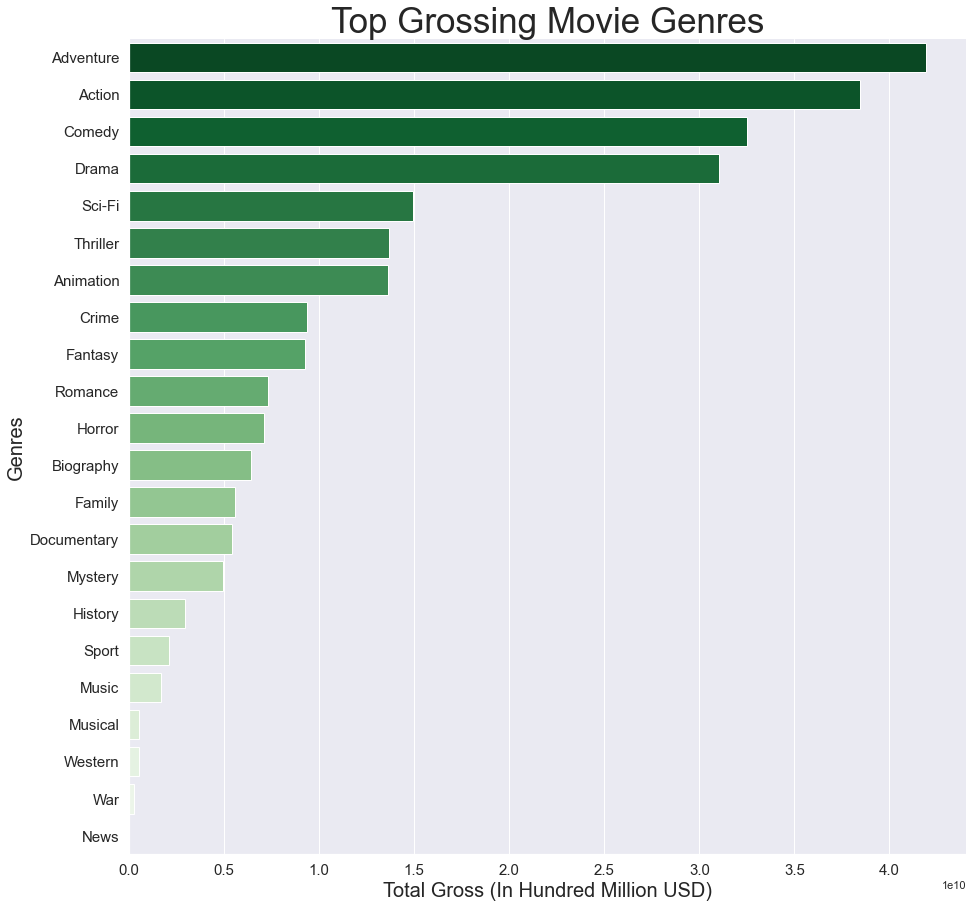

In [105]:
#set figure and specify plot size
sns.set(rc = {'figure.figsize':(15,15)})

#plot dataframe
sns.barplot(data=moviebasics_group_table, x="domestic_gross_x", y="genres", ci=None, palette='Greens_r')


#set ticks, labels, and title 
plt.title('Top Grossing Movie Genres', fontsize=35, fontname='Arial')
plt.xlabel('Total Gross (In Hundred Million USD)', fontsize=20, fontname='Arial')
plt.ylabel('Genres', fontsize=20, fontname='Arial')
plt.xticks(fontsize=15, fontname='Arial')
plt.yticks(fontsize=15, fontname='Arial')


sns.despine()
plt.show()

It looks like Adventure, Action and Comdey is the top grossing movie genre. 

Next, I prepared my data to create a scatter plot to show if there's a relationship between a movie's runtime and gross value. I chose to focus on movies that are full-length films rather than short films. 

In [87]:
runtimes_gross = pd.read_sql("""
    SELECT * 
    FROM imdb_runtime_df
    WHERE runtime_minutes >= 60 
    GROUP BY title_x
    ORDER BY domestic_gross_x desc;
        """, conn)
runtimes_gross

,title_x,domestic_gross_x,runtime_minutes,genres
0,Black Panther,700100000.0,134.0,Action
1,Avengers: Infinity War,678800000.0,149.0,Action
2,Jurassic World,652300000.0,124.0,Action
3,Star Wars: The Last Jedi,620200000.0,152.0,Action
4,Incredibles 2,608600000.0,118.0,Action
...,...,...,...,...
2592,Dark Tide,NaN,94.0,Action
2593,Celine: Through the Eyes of the World,NaN,120.0,Documentary
2594,6 Souls,NaN,112.0,Horror
2595,22 Bullets,NaN,117.0,Action


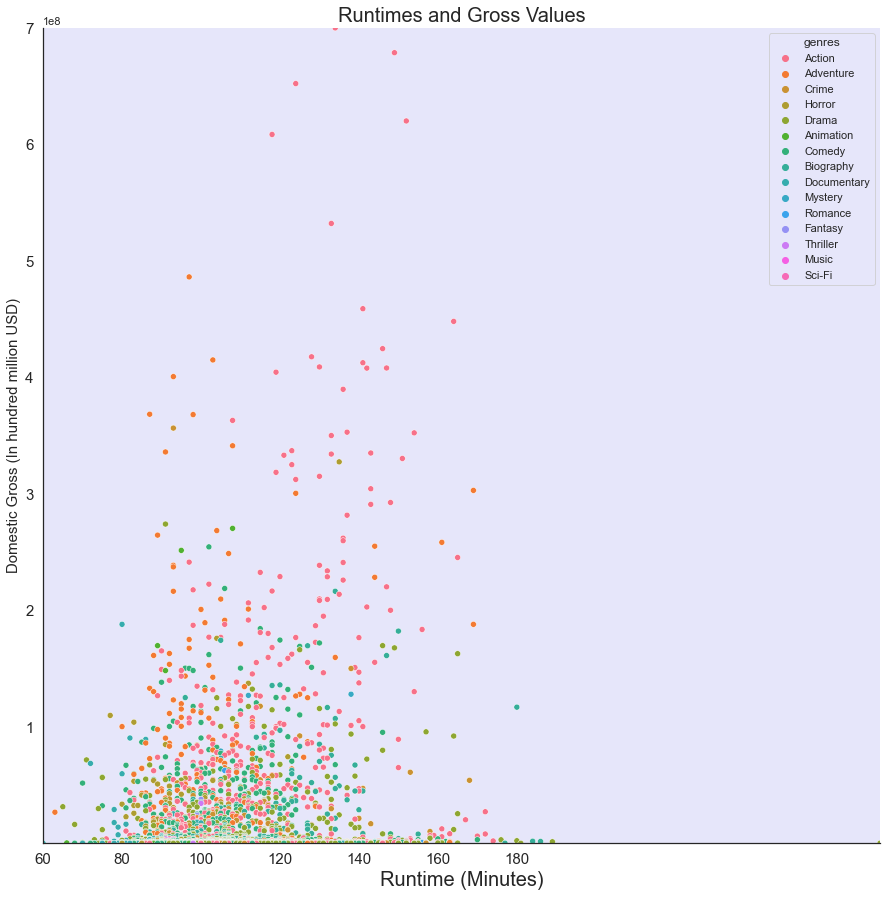

In [104]:
#set figure and specify plot size
sns.set_style("white")
plt.figure(figsize=(15,15))

plt.rcParams['axes.facecolor'] = 'lavender'
#plot runtime dataframe
sns.scatterplot(data=runtimes_gross, x="runtime_minutes", y="domestic_gross_x", hue="genres")

#set ticks, labels, and title 
plt.xticks(fontsize=15, fontname='Arial')
plt.yticks(fontsize=15, fontname='Arial')
plt.xlabel('Runtime (Minutes)', fontsize=20, fontname='Arial')
plt.ylabel('Domestic Gross (In hundred million USD)', fontsize=15, fontname='Arial')
plt.title('Runtimes and Gross Values', fontsize=20, fontname='Arial')

plt.xticks([60, 80, 100, 120, 140, 160, 180])
plt.margins(x=0, y=0)

sns.despine()
plt.show()

Most genres have a movie runtime between 80 to 140 minutes. Majority of the films do not gross more than a hundred million dollars. Though, films that do gross more than a hundred milion have a runtime between 100 to 180 minutes. The highest grossing film (Black Panther) is an action film with a runtime of 180 minutes. 

## Rotten Tomatoes

Now it's time to explore the Rotten Tomatoes data. I used pd.read to open the Rotten Tomatoes review datafile and Rotten Tomatoes Movie info file. 

In [19]:
rt_reviews = pd.read_csv('rt.reviews.tsv', delimiter="\t", header=0, encoding="unicode_escape'")
rt_reviews.head(6)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"


Rt_reviews is exactly what it sounds like. It's literally reviews of films that contain rating, publisher of reviews and name of critic. 

In [20]:
rt_info = pd.read_csv('rt.movie_info.tsv', delimiter = '\t', header=0, encoding="unicode_escape")
rt_info.head() 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


RT_info has details about genre, director, writer etc. Since both datafiles do not contain a movie title, I used the id column from rt_reviews and rt_info to see if they match up. After many trials of random selections of id numbers, I finally found a process. 

In [21]:
rt_reviews['id'][990:999]

990    25
991    25
992    25
993    25
994    25
995    25
996    25
997    25
998    25
Name: id, dtype: int64

ID 25 was the lucky number. As you can see index 990 to 999 displays the review for movie id 25. 

In [22]:
#change column display settings
pd.set_option('display.max_colwidth', None)
rt_reviews['review'][990:1000]

990                                                                                                                                                                                        Universal ruins Christmas and ends the cult of Keanu in one fell swoop.
991                                                                                                                              It's a mute-button movie, with passages of gorgeous cinematic craftsmanship. It's too bad the rest of the effort blocks the view.
992                                                                     Any story that's been passed down through several generations is likely to have been embellished along the way, but this adaptation of a Japanese folk tale takes things a little too far.
993                                                                                                                                                                    An overlong, underwhelming movie now hitting theaters th

It's time to look at rt_info. Another random selection of numbers (after many trials), 18 is a match! 

In [23]:
rt_info['synopsis'][15:19]

15    Two-time Academy Award Winner Kevin Spacey gives the performance of a lifetime in CASINO JACK, a riotous new film starring Spacey as a man hell bent on acquiring all that the good life has to offer. He plays in the same game as the highest of rollers and resorts to awe-inspiring levels of conning, scheming and fraudulent antics to get what he wants. Inspired by true events that are too over-the-top for even the wildest imaginations to conjure, CASINO JACK lays bare the wild excesses and escapades of Jack Abramoff. Aided by his business partner Michael Scanlon (Barry Pepper), Jack parlays his clout over some of the world's most powerful men with the goal of creating a personal empire of wealth and influence. When the two enlist a mob-connected buddy (Jon Lovitz) to help with one of their illegal schemes, they soon find themselves in over their heads, entrenched in a world of mafia assassins, murder and a scandal that spins so out of control that it makes worldwide headlines. Direc

Just to verify, I look at selection 18 a little closer to make sure it corresponds with the review from rt_review. 

In [24]:
rt_info['synopsis'][18]

"From ancient Japan's most enduring tale, the epic 3D fantasy-adventure 47 Ronin is born. Keanu Reeves leads the cast as Kai, an outcast who joins Oishi (Hiroyuki Sanada), the leader of 47 outcast samurai. Together they seek vengeance upon the treacherous overlord who killed their master and banished their kind. To restore honor to their homeland, the warriors embark upon a quest that challenges them with a series of trials that would destroy ordinary warriors. 47 Ronin is helmed by visionary director Carl Erik Rinsch (The Gift). Inspired by styles as diverse as Miyazaki and Hokusai, Rinsch will bring to life the stunning landscapes and enormous battles that will display the timeless Ronin story to global audiences in a way that's never been seen before. -- (C) Universal"

With the help of Google, the movie is 47 Ronin. Which stars Keanu Reeves. 

In [25]:
rt_info['id'][18]

25

<p>The final test was to see if the movie id from rt_info matches the movie id from rt_reviews. And lucky number 25 is a match! Now it's time to merge the two dataframes on Movie ID

In [26]:
#The movie IDs from RT_reviews and RT_info match so merge on ID 
rotten_tomatoes_df = rt_info.merge(rt_reviews, how='inner', on='id')
rotten_tomatoes_df.head(100)

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealings and digital communications and brief face-to-face conversations and sexual intermissions in a space shuttle of a limousine creeping through the gridlock of an anonymous New York City.,NaN,fresh,Sean Axmaker,0,Stream o

<p>I created a new dataframe to reflect the columns that I need for my analysis.</p>

In [27]:
rt_subset = rotten_tomatoes_df[['id', 'rating_x', 'genre', 'review', 'fresh']]
rt_subset.head()

,id,rating_x,genre,review,fresh
0,3,R,Drama|Science Fiction and Fantasy,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",fresh
1,3,R,Drama|Science Fiction and Fantasy,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,rotten
2,3,R,Drama|Science Fiction and Fantasy,... life lived in a bubble in financial dealings and digital communications and brief face-to-face conversations and sexual intermissions in a space shuttle of a limousine creeping through the gridlock of an anonymous New York City.,fresh
3,3,R,Drama|Science Fiction and Fantasy,"Continuing along a line introduced in last year's ""A Dangerous Method"", David Cronenberg pushes his cinema towards a talky abstraction in his uncanny, perversely funny and frighteningly insular adaptation of Don DeLillo, ""Cosmopolis"".",fresh
4,3,R,Drama|Science Fiction and Fantasy,... a perverse twist on neorealism...,fresh


In [28]:
#What genre has the most "fresh" review?
#need count of frequency for fresh values based on content rating and genre
#to count the number of fresh values I would need to create a for loop 

Changed column names to format data.

In [29]:
rt_subset.rename(columns = {'fresh':'rating', 'rating_x':'contentrating'}, inplace = True)

/Users/brittneynitta-lee/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


I used the explode function to reorganize genre combinations into individual genres. 

In [30]:
rt_subset['genre'] = rt_subset['genre'].str.split("|")
rt_subset_2 = rt_subset.explode('genre')

<ipython-input-30-0ca5509876af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_subset['genre'] = rt_subset['genre'].str.split("|")


I created a dictionary to assign numerical values to fresh and rotten ratings. Numerical values are now in a new column called numeric_rating. 

In [31]:
rating_map = {'fresh': 1, 'rotten' : -1}
rt_subset_2['numeric_rating'] = rt_subset_2['rating'].map(rating_map)
rt_subset_2

,id,contentrating,genre,review,rating,numeric_rating
0,3,R,Drama,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",fresh,1
0,3,R,Science Fiction and Fantasy,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",fresh,1
1,3,R,Drama,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,rotten,-1
1,3,R,Science Fiction and Fantasy,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,rotten,-1
2,3,R,Drama,... life lived in a bubble in financial dealings and digital communications and brief face-to-face conversations and sexual intermissions in a space shuttle of a limousine creeping through the gridlock of an anonymous New York City.,fresh,1
...,...,...,...,...,...,...
54431,2000,R,Action and Adventure,NaN,fresh,1
54431,2000,R,Art House and International,NaN,fresh,1
54431,2000,R,Comedy,NaN,fresh,1
54431,2000,R,Drama,NaN,fresh,1


In [32]:
genre_numeric_rating = (
    rt_subset_2
    .groupby('genre')
    .sum()
    .reset_index()
    .sort_values('numeric_rating', ascending = False)[['genre', 'numeric_rating']]
)
genre_numeric_rating

,genre,numeric_rating
8,Drama,10286
5,Comedy,3958
3,Art House and International,2334
15,Romance,2248
14,Mystery and Suspense,2002
0,Action and Adventure,1756
4,Classics,1153
12,Kids and Family,1119
1,Animation,929
16,Science Fiction and Fantasy,698


Genric_numeri_rating table shows each individual drama and their "fresh" or negative "rotten" rating. 

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

Time to plot the data!

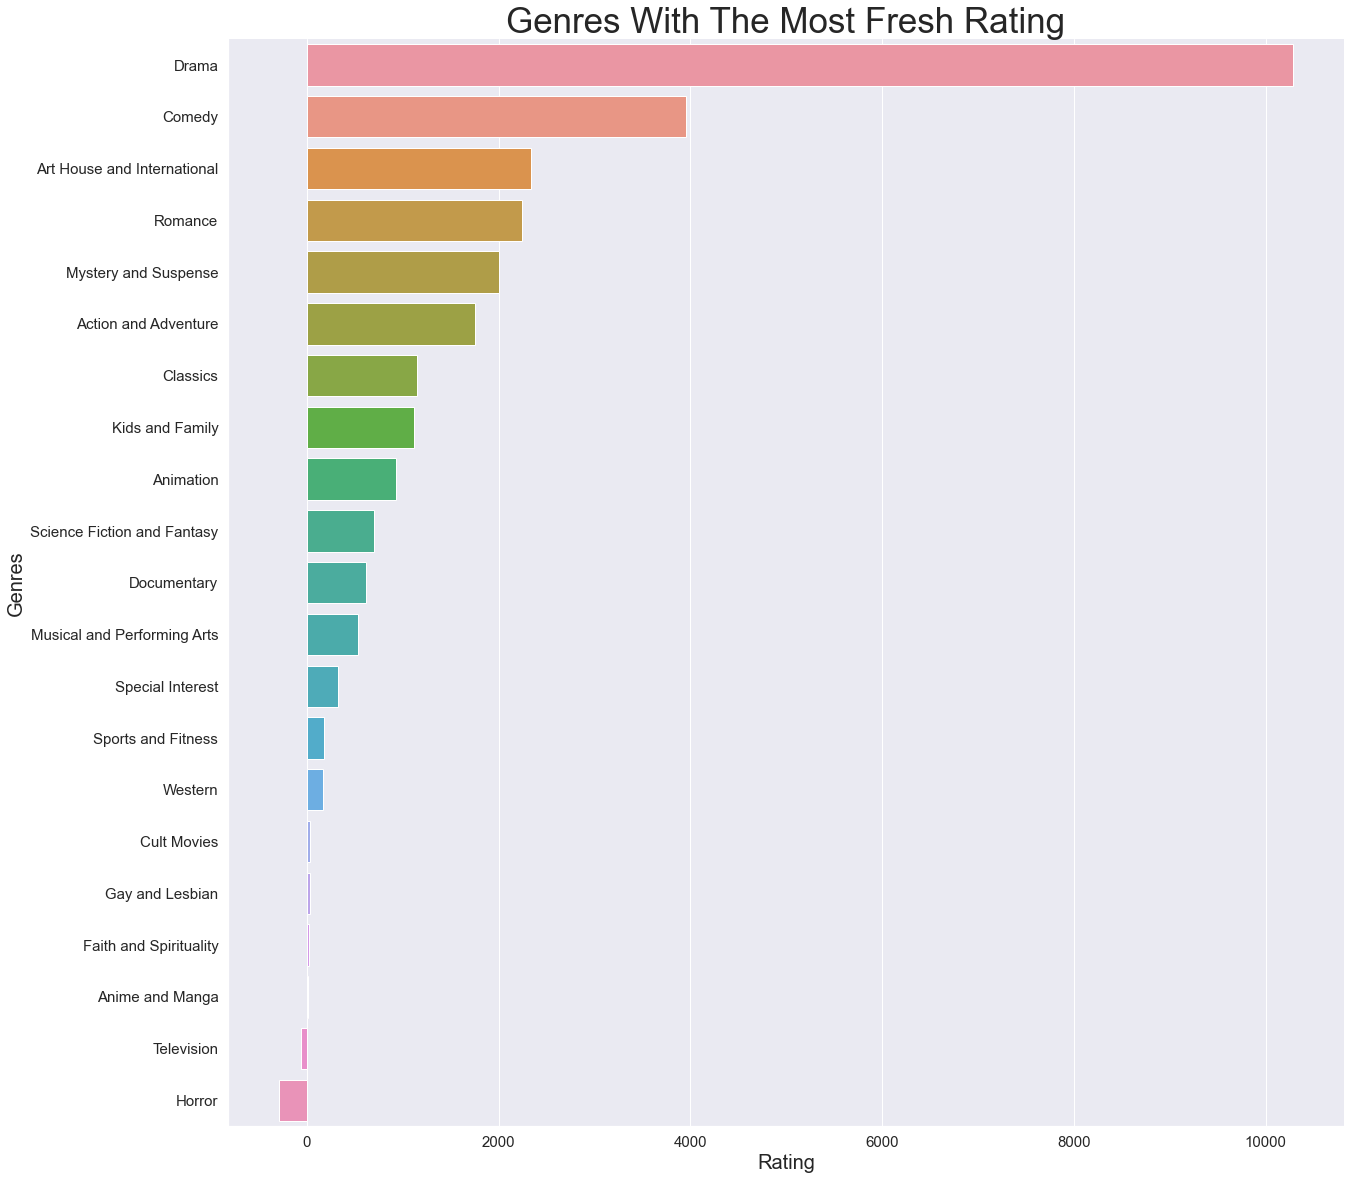

In [34]:
#set figure and specify plot size
sns.set_style('darkgrid')
sns.set_palette('Set2')

#plot dataframe
sns.barplot(data=genre_numeric_rating, x="numeric_rating", y="genre", ci=None)
sns.set(rc = {'figure.figsize':(20,15)})

#set ticks, labels, and title 
plt.title('Genres With The Most Fresh Rating', fontsize=35, fontname='Arial')
plt.xlabel('Rating', fontsize=20, fontname='Arial')
plt.ylabel('Genres', fontsize=20, fontname='Arial')
plt.xticks(fontsize=15, fontname='Arial')
plt.yticks(fontsize=15, fontname='Arial')


sns.despine()
plt.show()

To find the content rating with the most fresh reviews, I'll create a content rating dictionary and assign numeric values.

In [35]:
#What movie content rating has the most fresh reviews
 

contentrating_map = {'R': 0, 'PG' : 1, 'PG-13' : 2, 'NR' : 3, 'G' : 4}
rt_subset_2['numeric_contentrating'] = rt_subset_2['contentrating'].map(contentrating_map)
rt_subset_2

,id,contentrating,genre,review,rating,numeric_rating,numeric_contentrating
0,3,R,Drama,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",fresh,1,0.0
0,3,R,Science Fiction and Fantasy,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",fresh,1,0.0
1,3,R,Drama,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,rotten,-1,0.0
1,3,R,Science Fiction and Fantasy,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,rotten,-1,0.0
2,3,R,Drama,... life lived in a bubble in financial dealings and digital communications and brief face-to-face conversations and sexual intermissions in a space shuttle of a limousine creeping through the gridlock of an anonymous New York City.,fresh,1,0.0
...,...,...,...,...,...,...,...
54431,2000,R,Action and Adventure,NaN,fresh,1,0.0
54431,2000,R,Art House and International,NaN,fresh,1,0.0
54431,2000,R,Comedy,NaN,fresh,1,0.0
54431,2000,R,Drama,NaN,fresh,1,0.0


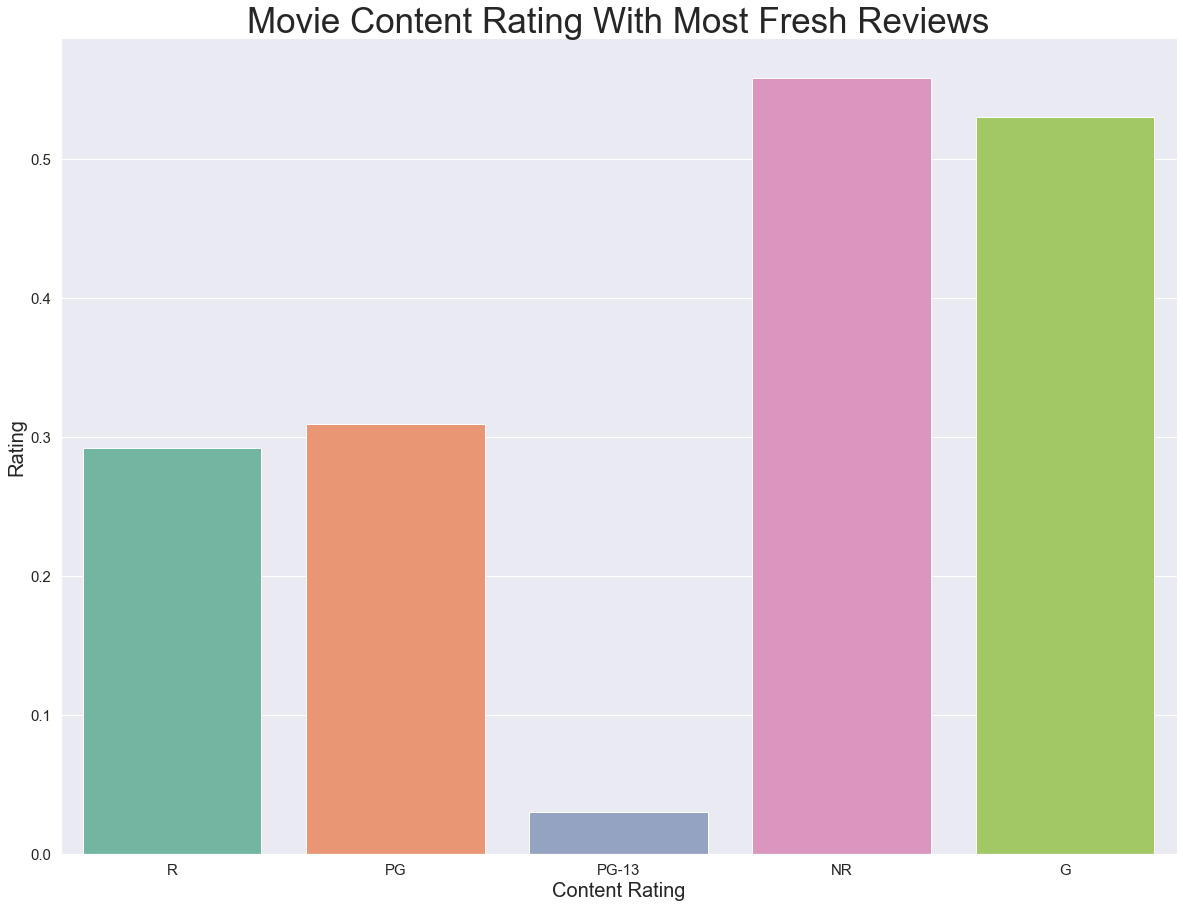

In [36]:
#set figure and specify plot size
sns.set_style('darkgrid')
sns.set_palette('Set2')

#plot dataframe
sns.barplot(data=rt_subset_2, x="contentrating", y="numeric_rating", ci=None)
sns.set(rc = {'figure.figsize':(15,15)})

#set ticks, labels, and title 
plt.title('Movie Content Rating With Most Fresh Reviews', fontsize=35, fontname='Arial')
plt.xlabel('Content Rating', fontsize=20, fontname='Arial')
plt.ylabel('Rating', fontsize=20, fontname='Arial')
plt.xticks(fontsize=15, fontname='Arial')
plt.yticks(fontsize=15, fontname='Arial')


sns.despine()
plt.show()

### Conclusion

In conclusion, the three recommendations are: 

<b> Genres </b> 
<p> The top grossing movie genres are adventure, action and comedy. 
<b> <p> Most high rated genres </b> </p> 
<p> Based on user ratings, drama and comedy are the highest rated. </p>
<p><b> Does movie runtimes affect profitability? </b></p>
<p> The highest-grossing films have a runtime of just over 2 hours. But, the ideal runtime legnth of a movie is 100 to 160 minutes.</p>
<b><p>Content Rating</p></b>
<p> Not rated or G rated films have the highest reviews and well-rated.</p>
